# Computer Assignment: Classification with a Perceptron

## Question 2: Generating the Gaussian Datasets
### Narrow Data

The following code generates the narrow set of Gaussian data. The plot is shown at the end of snippets. The two classes are indicated by using different colors.

In [0]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
def gauss_2d(mu, sigma):
    x = random.gauss(mu[0], sigma)
    y = random.gauss(mu[1], sigma)
    return (x, y)

In [0]:
first = []
second = []
mu1 = [1,1]
mu2 = [3,2]
sigma = 0.5
for _ in range(0,200):
  first.append(gauss_2d(mu1,sigma))
  second.append(gauss_2d(mu2,sigma))

In [0]:
first = np.array(first,dtype=float)
second = np.array(second,dtype=float)

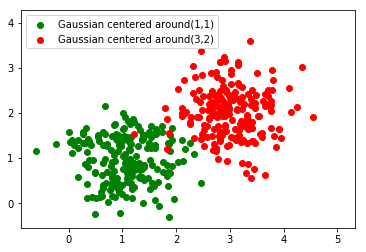

In [60]:
plt.scatter(first[:,0],first[:,1],color='green')
plt.scatter(second[:,0],second[:,1],color='red')
plt.scatter([5],[4],color='white')
plt.gca().legend(('Gaussian centered around(1,1)','Gaussian centered around(3,2)'))
plt.savefig('Narrow_Distribution.png', dpi=300, format='png', bbox_inches='tight')

### Wide Data
The following code generates the wide set of Gaussian data. The plot is shown at the end of snippets. The two classes are indicated by using different colors.

In [0]:
first_w = []
second_w = []
mu1 = [1,1]
mu2 = [3,2]
sigma = 0.75
for _ in range(0,200):
  first_w.append(gauss_2d(mu1,sigma))
  second_w.append(gauss_2d(mu2,sigma))

In [0]:
first_w = np.array(first_w,dtype=float)
second_w = np.array(second_w,dtype=float)

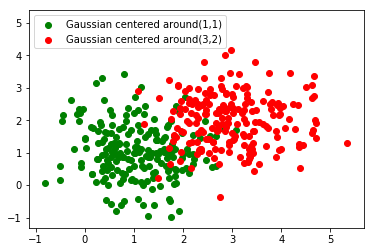

In [59]:
plt.scatter(first_w[:,0],first_w[:,1],color='green')
plt.scatter(second_w[:,0],second_w[:,1],color='red')
plt.scatter([5],[5],color='white')
plt.gca().legend(('Gaussian centered around(1,1)','Gaussian centered around(3,2)'))
plt.savefig('Wide_Distribution.png', dpi=300, format='png', bbox_inches='tight')

### Saving the datsets
Both the datasets are exported for future use.

In [0]:
labels = ['Label','x','y']
dataset_1 = []
dataset_2 = []
for i in range(0,200):
  dataset_1.append((0,first[i,0],first[i,1]))
  dataset_1.append((1,second[i,0],second[i,1]))
  dataset_2.append((0,first_w[i,0],first_w[i,1]))
  dataset_2.append((1,second_w[i,0],second_w[i,1]))

In [0]:
df_1 = pd.DataFrame.from_records(dataset_1, columns=labels)
df_2 = pd.DataFrame.from_records(dataset_2, columns=labels)

In [0]:
df_1.to_csv('Narrow_Gauss.csv',index=False)
df_2.to_csv('Wide_Gauss.csv',index=False)

## Question 3: Implementing the perceptron

### Base code and functions of perceptron
Writing base code and functions of a perceptron that can be trained over different datasets for different $\alpha$ values

In [0]:
class perceptron():

    def __init__(self):

        self.weights = []

    def act_fn(self, x):

        return 1.0 if x >=0 else -1.0

    def estimate(self, sample):

        bias = self.weights[0]
        x = np.insert(sample, 0, 1)
        z = np.array(self.weights).T.dot(x)
        act = self.act_fn(z)
        return act

    def train(self, data, l_rate):

        for i in range(len(data[0])):
            self.weights.append(float(0))

        n = 0
        history = []
        prev_error = float('inf')
        prev_weights = self.weights
        for _ in range(20):

            n += 1
            total_error = float(0)

            for sample in data:
                current_estimate = self.estimate(sample[0:len(sample)-1])
                label = sample[-1]
                error = label - current_estimate
                total_error += error**2
                self.weights[0] = self.weights[0] + l_rate * error

                for j in range(len(self.weights)-1):
                    self.weights[j+1] = self.weights[j+1] + l_rate * error * sample[j]

            #print('iteration : '+str(n)+"   error : "+str(round(total_error,4)))
            history.append(total_error)
            if total_error == float(0.0):
                break
            if prev_error > total_error:
                prev_weights = self.weights
                prev_error = total_error
        self.weights = prev_weights
        print('Minimum error : '+str(round(prev_error,4)))
        plt.plot(history)
        plt.title('Convergence of error on learning rate :'+str(l_rate))
        plt.xlabel('Epoch')
        plt.ylabel('Error')

    def predict(self, X):

        predictions = []
        for n in X:
            current_prediction = self.estimate(n)
            predictions.append(current_prediction)

        return predictions

    def score(self,X, Y):

        predictions = self.predict(X)
        correct_predictions = 0
        for i in range(len(predictions)):
            if predictions[i] == Y[i]:
                correct_predictions += 1
        score = float(correct_predictions) / len(Y)
        return score

    def plot(self, X,Y):

        plt.scatter(X[:,0],X[:,1], color='g')
        plt.scatter(Y[:,0],Y[:,1], color='r')
        y_int = (self.weights[2]-self.weights[0])/self.weights[1]
        x_int = (self.weights[1]-self.weights[0])/self.weights[2]
        plt.plot([-1,x_int],[y_int,-1])
        plt.show()


In [0]:
ds_1 = []
ds_2 = []
l1 = []
l2 = []
for i in range(0,200):
  ds_1.append([first[i,0],first[i,1],1])
  ds_1.append([second[i,0],second[i,1],-1])
  ds_2.append([first_w[i,0],first_w[i,1],1])
  ds_2.append([second_w[i,0],second_w[i,1],-1])

ds_1 = np.array(ds_1)
ds_2 = np.array(ds_2)

Minimum error : 44.0


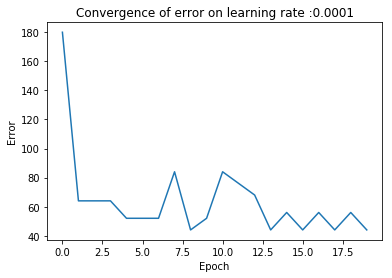

In [200]:
per1 = perceptron()
per1.train(ds_1,0.0001)

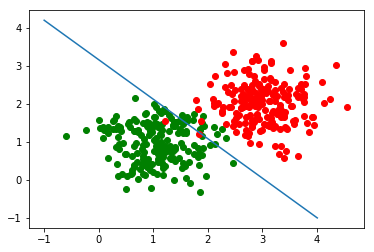

In [178]:
per2.plot(first,second)

Minimum error : 44.0


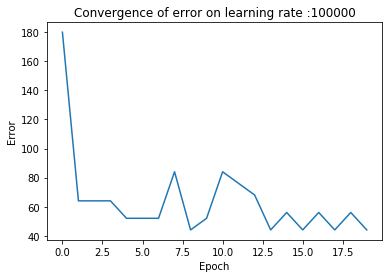

In [198]:
per2 = perceptron()
per2.train(ds_1,3)

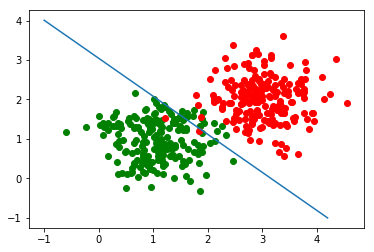

In [170]:
per2.plot(first,second)

Minimum error : 168.0


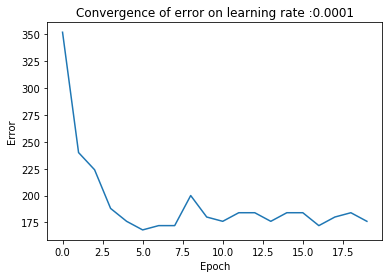

In [192]:
per3 = perceptron()
per3.train(ds_2,0.0001)

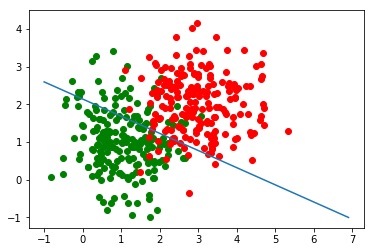

In [172]:
per3.plot(first_w,second_w)

Minimum error : 168.0


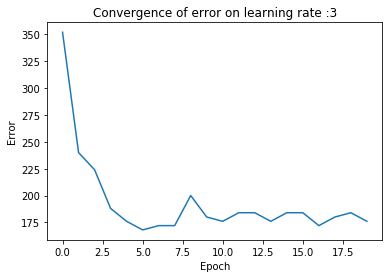

In [201]:
per4 = perceptron()
per4.train(ds_2,3)

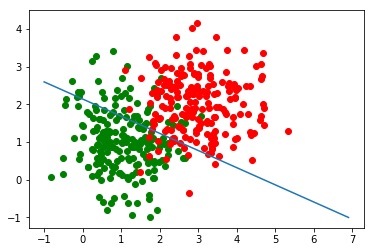

In [174]:
per4.plot(first_w,second_w)